Final Project - Nicholas Reade

In [1]:
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from numpy import exp
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
# intel data set
intc = pd.read_csv(r'/Users/nickreade/Downloads/INTC.csv')
intc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,63.970001,64.150002,62.939999,63.669998,62.023041,21546200
1,2020-06-09,62.990002,63.709999,62.900002,63.040001,61.409340,23594100
2,2020-06-10,62.790001,64.290001,62.750000,63.869999,62.217869,21367800
3,2020-06-11,63.070000,63.299999,59.520000,59.700001,58.155735,26998200
4,2020-06-12,60.110001,60.959999,58.119999,59.330002,57.795307,30419800
...,...,...,...,...,...,...,...
248,2021-06-02,56.910000,57.689999,56.759998,57.480000,57.480000,18483600
249,2021-06-03,56.980000,57.099998,56.090000,56.240002,56.240002,21831300
250,2021-06-04,56.549999,57.750000,56.540001,57.369999,57.369999,21487300
251,2021-06-07,57.410000,57.439999,56.779999,57.090000,57.090000,17356400


In [5]:
# import apple data set
appl = pd.read_csv(r'/Users/nickreade/Downloads/AAPL.csv')
appl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,82.562500,83.400002,81.830002,83.364998,82.807037,95654400
1,2020-06-09,83.035004,86.402496,83.002502,85.997498,85.421921,147712400
2,2020-06-10,86.974998,88.692497,86.522499,88.209999,87.619614,166651600
3,2020-06-11,87.327499,87.764999,83.870003,83.974998,83.412964,201662400
4,2020-06-12,86.180000,86.949997,83.555000,84.699997,84.133095,200146000
...,...,...,...,...,...,...,...
248,2021-06-02,124.279999,125.239998,124.050003,125.059998,125.059998,59278900
249,2021-06-03,124.680000,124.849998,123.129997,123.540001,123.540001,76229200
250,2021-06-04,124.070000,126.160004,123.849998,125.889999,125.889999,75087300
251,2021-06-07,126.169998,126.320000,124.830002,125.900002,125.900002,70927000


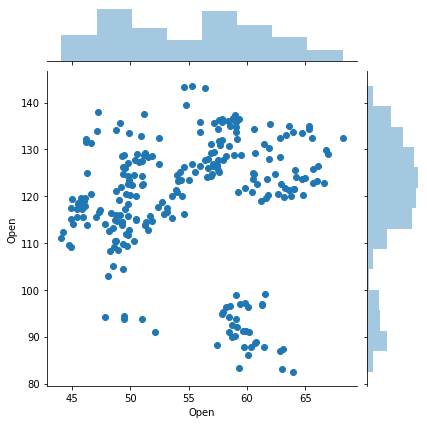

In [10]:
sns.jointplot(x=intc['Open'],y=appl['Open'])

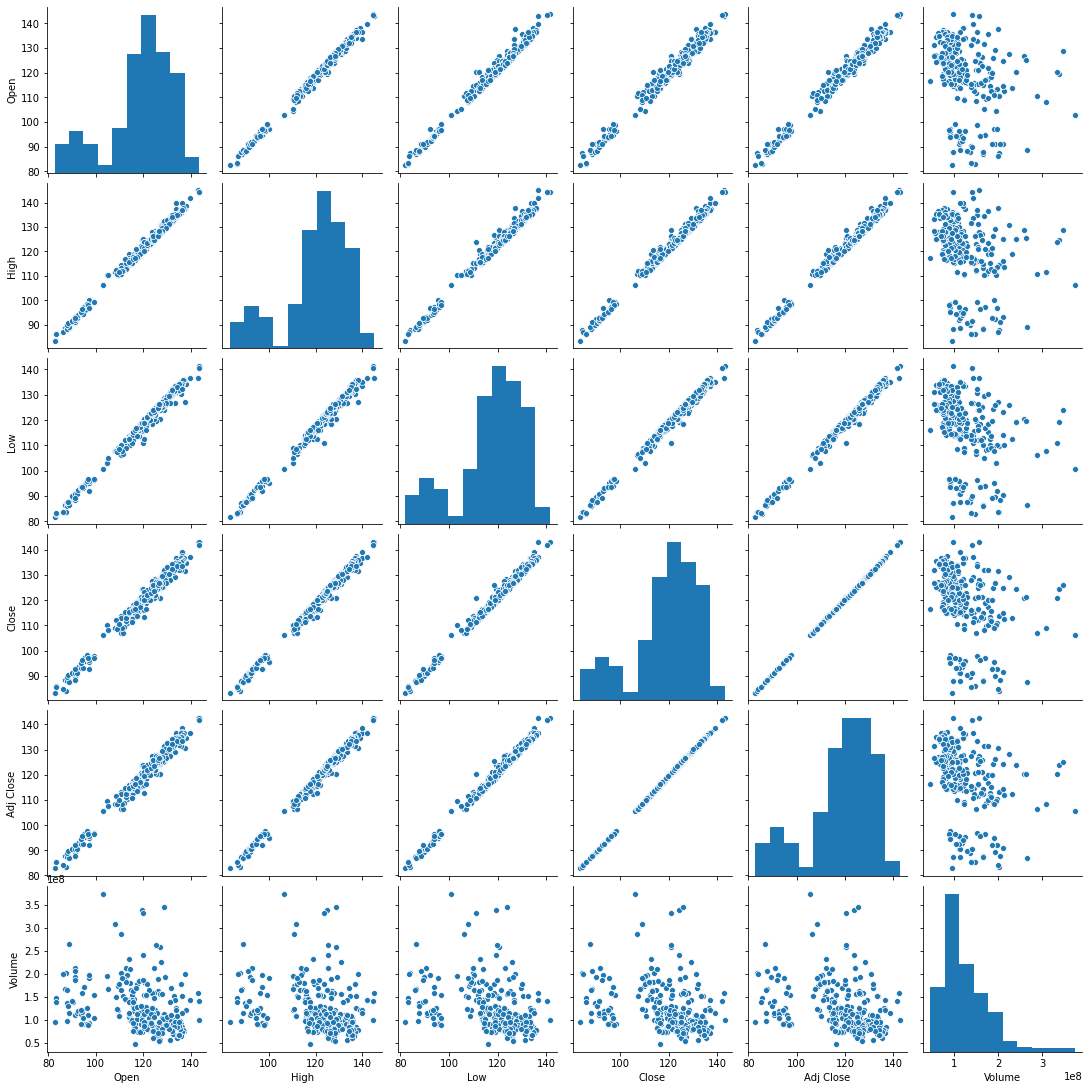

In [14]:
sns.pairplot(appl)

<function matplotlib.pyplot.show(*args, **kw)>

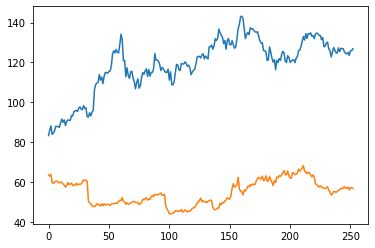

In [15]:
Dates = np.array(range(0, 253))
PricesAAPL = appl["Close"]
PricesINTC = intc["Close"]

# plot code
plt.plot(Dates, PricesAAPL)
plt.plot(Dates, PricesINTC)
plt.show

In [26]:
# stock fit 
def stock_fit1(PricesAAPL, Dates):
    bm = PricesAAPL
    y = PricesAAPL;
    x = Dates;
    t = Dates;
    
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;
    
    #linear least squares
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(t*sum(x**2)-sum(x)**2);
    a1=(t*sum(x*y)-sum(x)*sum(y))/(t*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    #legendre polynomials
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;
    
    #chebyshev polynomials
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;
    
    #error calculation via lowest norm 2
    error=[];
    error.append(np.linalg.norm(y-p1(t),2));
    error.append(np.linalg.norm(y-p2(t),2));
    error.append(np.linalg.norm(y-p3(t),2));
    error.append(np.linalg.norm(y-p4(t),2));
    error.append(np.linalg.norm(y-p5(t),2));
    error.append(np.linalg.norm(y-p6(t),2));
    error.append(np.linalg.norm(y-p7(t),2));
    error.append(np.linalg.norm(y-p8(t),2));
    error.append(np.linalg.norm(y-lsp(t),2));
    error.append(np.linalg.norm(y-ch1(t),2));
    error.append(np.linalg.norm(y-ch2(t),2));
    error.append(np.linalg.norm(y-ch3(t),2));
    error.append(np.linalg.norm(y-lpoly1(t),2));
    error.append(np.linalg.norm(y-lpoly2(t),2));
    error.append(np.linalg.norm(y-lpoly3(t),2));
    
    #identifying the index of the error vector to pick the most accurate function
    
    ident=error.index(min(error)); 
    if (ident==0):
        p=p1;
    if (ident==1):
        p=p2;
    if (ident==2):
        p=p3;
    if (ident==3):
        p=p4;
    if (ident==4):
        p=p5;
    if (ident==5):
        p=p6;
    if (ident==6):
        p=p7;
    if (ident==7):
        p=p8;
    if (ident==8):
        p=lsp;
    if (ident==9):
        p=ch1;
    if (ident==10):
        p=ch2;
    if (ident==11):
        p=ch3;
    if (ident==12):
        p=lpoly1;
    if (ident==13):
        p=lpoly2;
    if (ident==14):
        p=lpoly3;
        
    plt.plot(t, y)
    plt.plot(t, p(t))
    returns = [0]; #initializing to avoid NaN values at i=0; calculating returns at each point in time
    for i in range(1,t-1):
        returns.append((p(t[i+1])-p(t[i]))/(t[i]))
    meanf=np.mean(returns)
    
    return meanf,returns,ident,x,y

TypeError: only integer scalar arrays can be converted to a scalar index

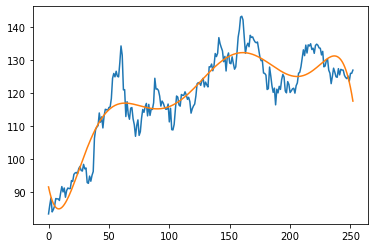

In [27]:
stock_fit1(PricesAAPL, Dates);
stock_fit2(PricesINTC, Dates);

In [28]:
# stock fit 
def stock_fit2(PricesINTC, Dates):
    bm = PricesINTC
    y = PricesINTC;
    x = Dates;
    t = Dates;
    
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;
    
    #linear least squares
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(n*sum(x**2)-sum(x)**2);
    a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    #legendre polynomials
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;
    
    #chebyshev polynomials
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;
    
    #error calculation via lowest norm 2
    error=[];
    error.append(np.linalg.norm(y-p1(t),2));
    error.append(np.linalg.norm(y-p2(t),2));
    error.append(np.linalg.norm(y-p3(t),2));
    error.append(np.linalg.norm(y-p4(t),2));
    error.append(np.linalg.norm(y-p5(t),2));
    error.append(np.linalg.norm(y-p6(t),2));
    error.append(np.linalg.norm(y-p7(t),2));
    error.append(np.linalg.norm(y-p8(t),2));
    error.append(np.linalg.norm(y-lsp(t),2));
    error.append(np.linalg.norm(y-ch1(t),2));
    error.append(np.linalg.norm(y-ch2(t),2));
    error.append(np.linalg.norm(y-ch3(t),2));
    error.append(np.linalg.norm(y-lpoly1(t),2));
    error.append(np.linalg.norm(y-lpoly2(t),2));
    error.append(np.linalg.norm(y-lpoly3(t),2));
    
    #identifying the index of the error vector to pick the most accurate function
    
    ident=error.index(min(error)); 
    if (ident==0):
        p=p1;
    if (ident==1):
        p=p2;
    if (ident==2):
        p=p3;
    if (ident==3):
        p=p4;
    if (ident==4):
        p=p5;
    if (ident==5):
        p=p6;
    if (ident==6):
        p=p7;
    if (ident==7):
        p=p8;
    if (ident==8):
        p=lsp;
    if (ident==9):
        p=ch1;
    if (ident==10):
        p=ch2;
    if (ident==11):
        p=ch3;
    if (ident==12):
        p=lpoly1;
    if (ident==13):
        p=lpoly2;
    if (ident==14):
        p=lpoly3;
        
    plt.plot(t, y)
    plt.plot(t, p(t))
    returns = [0]; #initializing to avoid NaN values at i=0; calculating returns at each point in time
    for i in range(1,n-1):
        returns.append((p(t[i+1])-p(t[i]))/(t[i]))
    meanf=np.mean(returns)
    
    return meanf,returns,ident,x,y

In [29]:
INTC = stock_fit2(PricesINTC, Dates)

NameError: name 'n' is not defined

In [30]:
# assign variables for the stock data
asset1 = AAPL
asset2 = INTC
# use the normal variables
c=np.cov(asset1[1],asset2[1]);
mu=np.array([asset1[0],asset2[0]])
u=np.ones((2,), dtype=int)
cinv = np.linalg.inv(c)
w=np.matmul(u,cinv)/np.matmul(np.matmul(u,cinv),np.transpose(u))
muv=np.matmul(mu,np.transpose(w))
sigv=(np.matmul(np.matmul(w,c), np.transpose(w))) ** 0.5;

print('Minimum Variance Portfolio found via Function Approximation')
print('Weights of $AAPL and $INTC')
print(w)
print('expected return')
print(muv)
print('expected risk')
print(sigv)

NameError: name 'AAPL' is not defined

In [133]:
def brownfit(n):
    #simulating a brownian motion with given step input n
    step_size = 1/n;
    t = np.linspace(0,1,n)
    bm = np.cumsum(np.random.normal(0, math.sqrt(step_size), n))
    plt.title("Brownian Motion and Optimal Functional Approximation of Price Progression")
    plt.xlabel("Time [0,1]")
    plt.ylabel("Brownian motion sample paths as points")
    y = bm;
    x=t;
    
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;
    
    #linear least squares
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(n*sum(x**2)-sum(x)**2);
    a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    #legendre polynomials
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;
    
    #chebyshev polynomials
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;
    
    #error calculation via lowest norm 2
    error=[];
    error.append(np.linalg.norm(y-p1(t),2));
    error.append(np.linalg.norm(y-p2(t),2));
    error.append(np.linalg.norm(y-p3(t),2));
    error.append(np.linalg.norm(y-p4(t),2));
    error.append(np.linalg.norm(y-p5(t),2));
    error.append(np.linalg.norm(y-p6(t),2));
    error.append(np.linalg.norm(y-p7(t),2));
    error.append(np.linalg.norm(y-p8(t),2));
    error.append(np.linalg.norm(y-lsp(t),2));
    error.append(np.linalg.norm(y-ch1(t),2));
    error.append(np.linalg.norm(y-ch2(t),2));
    error.append(np.linalg.norm(y-ch3(t),2));
    error.append(np.linalg.norm(y-lpoly1(t),2));
    error.append(np.linalg.norm(y-lpoly2(t),2));
    error.append(np.linalg.norm(y-lpoly3(t),2));
    
    #identifying the index of the error vector to pick the most accurate function
    
    ident=error.index(min(error)); 
    if (ident==0):
        p=p1;
    if (ident==1):
        p=p2;
    if (ident==2):
        p=p3;
    if (ident==3):
        p=p4;
    if (ident==4):
        p=p5;
    if (ident==5):
        p=p6;
    if (ident==6):
        p=p7;
    if (ident==7):
        p=p8;
    if (ident==8):
        p=lsp;
    if (ident==9):
        p=ch1;
    if (ident==10):
        p=ch2;
    if (ident==11):
        p=ch3;
    if (ident==12):
        p=lpoly1;
    if (ident==13):
        p=lpoly2;
    if (ident==14):
        p=lpoly3;
        
    plt.plot(t, y, 'ro')
    plt.plot(t, p(t))
    returns = [0]; #initializing to avoid NaN values at i=0; calculating returns at each point in time
    for i in range(1,n-1):
        returns.append((p(t[i+1])-p(t[i]))/(t[i]))
    meanf=np.mean(returns)
    
    return meanf,returns,ident


array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7.]])

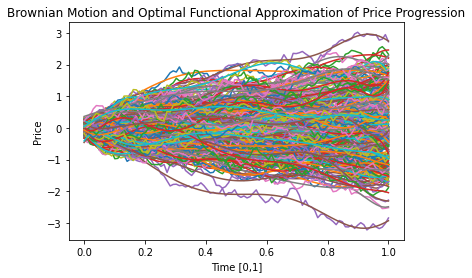

In [328]:
# test for best degree
a=np.zeros(shape=(2,100))
for i in range(0,100):
    a[0,i]=brownfit(100)[2]
    a[1,i]=brownfit(100)[2]
a

In [ ]:
# for the use of the report 
# start here

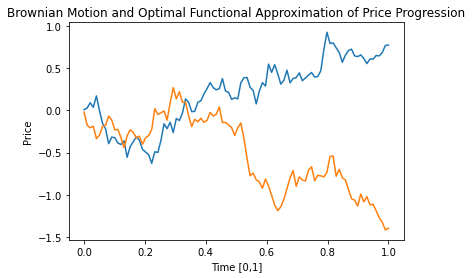

In [35]:
n = 100
step_size = 1/n;
t = np.linspace(0,1,n)

# brownfit 1
bm1 = np.cumsum(np.random.normal(0, math.sqrt(step_size), n))
plt.title("Brownian Motion and Optimal Functional Approximation of Price Progression")
plt.xlabel("Time [0,1]")
plt.ylabel("Price")
y1=bm1;
x1=t;
plt.plot(x1, y1)

# brownfit 2
bm2 = np.cumsum(np.random.normal(0, math.sqrt(step_size), n))
plt.title("Brownian Motion and Optimal Functional Approximation of Price Progression")
plt.xlabel("Time [0,1]")
plt.ylabel("Price")
y2 = bm2;
x2 = t;

plt.plot(x2, y2)

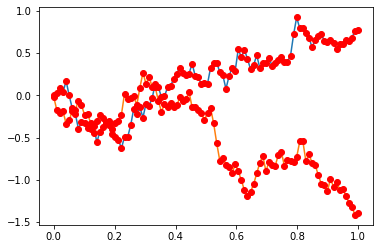

In [36]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')

In [37]:
# polynomial fit 1
def poly1(x1, y1):
    t = x1;
    x = x1;
    y = y1;
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, p7(t))
    
    return p1, p2, p3, p4, p5, p6, p7, p8

(<function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>,
 <function __main__.poly1.<locals>.<lambda>(x)>)

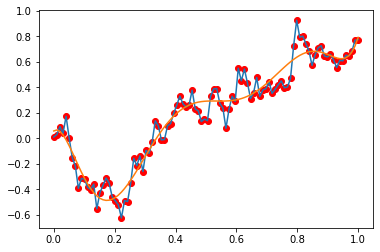

In [38]:
poly1(x1, y1)

In [39]:
def poly2(x2, y2):
    t = x2;
    y = y2;
    x = x2;
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, p7(t))
    
    return p1, p2, p3, p4, p5, p6, p7, p8

(<function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>,
 <function __main__.poly2.<locals>.<lambda>(x)>)

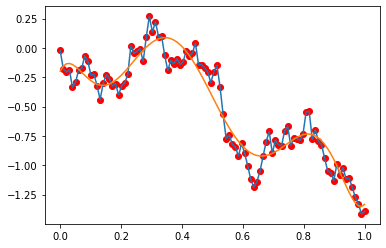

In [40]:
poly2(x2, y2)

In [41]:
#linear least squares
def ls1(x1, y1, n):
    t = x1;
    y = y1;
    x = x1;
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(n*sum(x**2)-sum(x)**2);
    a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, lsp(t))
    
    return lsp

<function __main__.ls1.<locals>.<lambda>(x)>

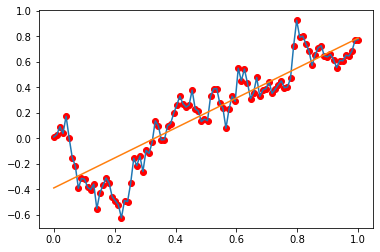

In [42]:
ls1(x1, y1, n)

In [43]:
#linear least squares
def ls2(x2, y2, n):
    t = x2;
    y = y2;
    x = x2;
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(n*sum(x**2)-sum(x)**2);
    a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, lsp(t))
    
    return lsp

<function __main__.ls2.<locals>.<lambda>(x)>

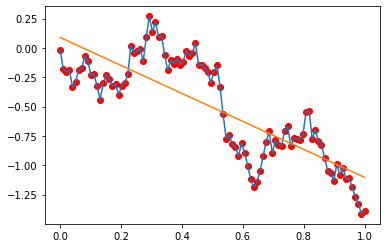

In [44]:
ls2(x2, y2, n)

In [45]:
#legendre polynomials
def leg1(bm1, x1, y1, n):
    t = x1;
    y = y1;
    x = x1;
    bm = bm1;
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, lpoly1(t))
    
    return lpoly1, lpoly2, lpoly3

(<function __main__.leg1.<locals>.<lambda>(x)>,
 <function __main__.leg1.<locals>.<lambda>(x)>,
 <function __main__.leg1.<locals>.<lambda>(x)>)

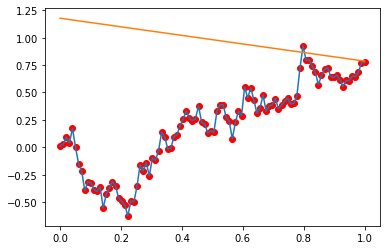

In [46]:
leg1(bm1, x1, y1, n)

In [47]:
def leg2(bm2, x2, y2, n):
    t = x2;
    y = y2;
    x = x2;
    bm = bm2;
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, lpoly1(t))
    
    return lpoly1, lpoly2, lpoly3

(<function __main__.leg2.<locals>.<lambda>(x)>,
 <function __main__.leg2.<locals>.<lambda>(x)>,
 <function __main__.leg2.<locals>.<lambda>(x)>)

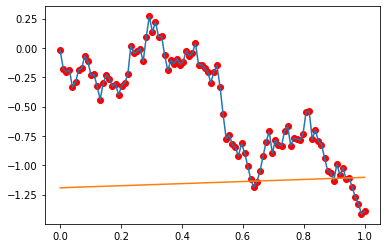

In [48]:
leg2(bm2, x2, y2, n)

In [49]:
#chebyshev polynomials
def cheb1(x1, y1):
    y = y1;
    x = x1;
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, ch3(t))
    
    return ch1, ch2, ch3

(<function __main__.cheb1.<locals>.<lambda>(x)>,
 <function __main__.cheb1.<locals>.<lambda>(x)>,
 <function __main__.cheb1.<locals>.<lambda>(x)>)

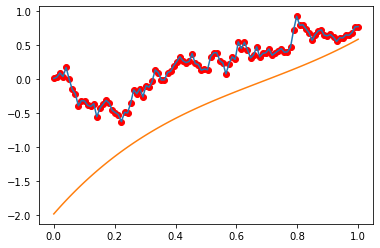

In [50]:
cheb1(x1, y1)

In [51]:
#chebyshev polynomials
def cheb2(x2, y2):
    y = y2;
    x = x2;
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;

    plt.plot(t, y, 'ro')
    plt.plot(t, y)
    plt.plot(t, ch3(t))
    
    return ch1, ch2, ch3

(<function __main__.cheb2.<locals>.<lambda>(x)>,
 <function __main__.cheb2.<locals>.<lambda>(x)>,
 <function __main__.cheb2.<locals>.<lambda>(x)>)

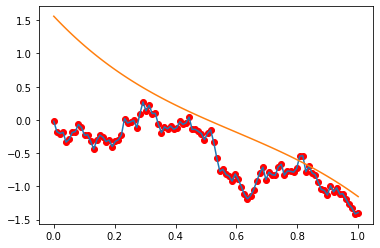

In [52]:
cheb2(x2, y2)

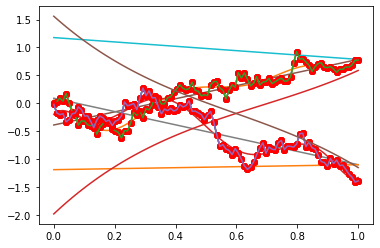

In [53]:
# poly vals
poly1_val = poly1(x1, y1)
poly2_val = poly2(x2, y2)
# ls vals
ls1_val = ls1(x1, y1, n)
ls2_val = ls2(x2, y2, n)
# leg vals
leg1_vals = leg1(bm1, x1, y1, n)
leg2_vals = leg2(bm2, x2, y2, n)
# cheb vals
che1_vals = cheb1(x1, y1)
che2_vals = cheb2(x2, y2)

def comp_error1(poly1_val, ls1_val, leg1_vals, che1_vals, x1, y1, n):
    x = x1;
    t = x1;
    y = y1;
    #error calculation via lowest norm 2
    error=[];
    error.append(np.linalg.norm(y-p1(t),2));
    error.append(np.linalg.norm(y-p2(t),2));
    error.append(np.linalg.norm(y-p3(t),2));
    error.append(np.linalg.norm(y-p4(t),2));
    error.append(np.linalg.norm(y-p5(t),2));
    error.append(np.linalg.norm(y-p6(t),2));
    error.append(np.linalg.norm(y-p7(t),2));
    error.append(np.linalg.norm(y-p8(t),2));
    error.append(np.linalg.norm(y-lsp(t),2));
    error.append(np.linalg.norm(y-ch1(t),2));
    error.append(np.linalg.norm(y-ch2(t),2));
    error.append(np.linalg.norm(y-ch3(t),2));
    error.append(np.linalg.norm(y-lpoly1(t),2));
    error.append(np.linalg.norm(y-lpoly2(t),2));
    error.append(np.linalg.norm(y-lpoly3(t),2));
    
    #identifying the index of the error vector to pick the most accurate function
    
    ident=error.index(min(error)); 
    if (ident==0):
        p=p1;
    if (ident==1):
        p=p2;
    if (ident==2):
        p=p3;
    if (ident==3):
        p=p4;
    if (ident==4):
        p=p5;
    if (ident==5):
        p=p6;
    if (ident==6):
        p=p7;
    if (ident==7):
        p=p8;
    if (ident==8):
        p=lsp;
    if (ident==9):
        p=ch1;
    if (ident==10):
        p=ch2;
    if (ident==11):
        p=ch3;
    if (ident==12):
        p=lpoly1;
    if (ident==13):
        p=lpoly2;
    if (ident==14):
        p=lpoly3;
        
    plt.plot(t, y, 'ro')
    plt.plot(t, p(t))
    returns = [0]; #initializing to avoid NaN values at i=0; calculating returns at each point in time
    for i in range(1,n-1):
        returns.append((p(t[i+1])-p(t[i]))/(t[i]))
    meanf=np.mean(returns)
    
    return meanf,returns,ident

In [54]:
# orginal function 

In [55]:
def brownfit(n):
    #simulating a brownian motion with given step input n
    step_size = 1/n;
    t = np.linspace(0,1,n)
    bm = np.cumsum(np.random.normal(0, math.sqrt(step_size), n))
    plt.title("Brownian Motion and Optimal Functional Approximation of Price Progression")
    plt.xlabel("Time [0,1]")
    plt.ylabel("Price")
    y = bm;
    x=t;
    
    #polynomial fits for degrees 1 through 8
    fit1 = np.polyfit(t, y, 1);
    fit2 = np.polyfit(t, y, 2);
    fit3 = np.polyfit(t, y, 3);
    fit4 = np.polyfit(t, y, 4);
    fit5 = np.polyfit(t, y, 5);
    fit6 = np.polyfit(t, y, 6);
    fit7 = np.polyfit(t, y, 7);
    fit8 = np.polyfit(t, y, 8);
    p1 = lambda x: fit1[1] + fit1[0]*x;
    p2 = lambda x: fit2[2] + fit2[1]*x + fit2[0]*x**2;
    p3 = lambda x: fit3[3] + fit3[2]*x + fit3[1]*x**2 + fit3[0]*x**3;
    p4 = lambda x: fit4[4] + fit4[3]*x + fit4[2]*x**2 + fit4[1]*x**3 + fit4[0]*x**4;
    p5 = lambda x: fit5[5] + fit5[4]*x + fit5[3]*x**2 + fit5[2]*x**3 + fit5[1]*x**4 + fit5[0]*x**5;
    p6 = lambda x: fit6[6] + fit6[5]*x + fit6[4]*x**2 + fit6[3]*x**3 + fit6[2]*x**4 + fit6[1]*x**5 + fit6[0]*x**6
    p7 = lambda x: fit7[7] + fit7[6]*x + fit7[5]*x**2 + fit7[4]*x**3 + fit7[3]*x**4 + fit7[2]*x**5 + fit7[1]*x**6 + fit7[0]*x**7;
    p8 = lambda x: fit8[8] + fit8[7]*x + fit8[6]*x**2 + fit8[5]*x**3 + fit8[4]*x**4 + fit8[3]*x**5 + fit8[2]*x**6 + fit8[1]*x**7 + fit8[0]*x**8;
    
    #linear least squares
    a0=(sum(x**2)*sum(y)-sum(x*y)*sum(x))/(n*sum(x**2)-sum(x)**2);
    a1=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2);
    lsp=lambda x: a0+a1*x;

    #legendre polynomials
    leg1 = np.polynomial.legendre.legfit(t, bm, 1)
    leg2 = np.polynomial.legendre.legfit(t, bm, 2)
    leg3= np.polynomial.legendre.legfit(t, bm, 3);
    lpoly1 = lambda x: leg1[1] + leg1[0]*x;
    lpoly2 = lambda x: leg2[2]+leg2[1]*x+leg2[0]*x**2;
    lpoly3 = lambda x: leg3[3] + leg3[2]*x + leg3[1]*x**2 + leg3[0]*x**3;
    
    #chebyshev polynomials
    cheb1=np.polynomial.legendre.legfit(t, y, 1)
    cheb2=np.polynomial.legendre.legfit(t, y, 2)
    cheb3=np.polynomial.legendre.legfit(t, y, 3)
    ch1=lambda x: cheb1[1]+cheb1[0]*x;
    ch2=lambda x: cheb2[2]+cheb2[1]*x+cheb2[0]*x**2;
    ch3=lambda x: cheb3[3]+cheb3[2]*x+cheb3[1]*x**2+cheb3[0]*x**3;
    
    #error calculation via lowest norm 2
    error=[];
    error.append(np.linalg.norm(y-p1(t),2));
    error.append(np.linalg.norm(y-p2(t),2));
    error.append(np.linalg.norm(y-p3(t),2));
    error.append(np.linalg.norm(y-p4(t),2));
    error.append(np.linalg.norm(y-p5(t),2));
    error.append(np.linalg.norm(y-p6(t),2));
    error.append(np.linalg.norm(y-p7(t),2));
    error.append(np.linalg.norm(y-p8(t),2));
    error.append(np.linalg.norm(y-lsp(t),2));
    error.append(np.linalg.norm(y-ch1(t),2));
    error.append(np.linalg.norm(y-ch2(t),2));
    error.append(np.linalg.norm(y-ch3(t),2));
    error.append(np.linalg.norm(y-lpoly1(t),2));
    error.append(np.linalg.norm(y-lpoly2(t),2));
    error.append(np.linalg.norm(y-lpoly3(t),2));
    
    #identifying the index of the error vector to pick the most accurate function
    
    ident=error.index(min(error)); 
    if (ident==0):
        p=p1;
    if (ident==1):
        p=p2;
    if (ident==2):
        p=p3;
    if (ident==3):
        p=p4;
    if (ident==4):
        p=p5;
    if (ident==5):
        p=p6;
    if (ident==6):
        p=p7;
    if (ident==7):
        p=p8;
    if (ident==8):
        p=lsp;
    if (ident==9):
        p=ch1;
    if (ident==10):
        p=ch2;
    if (ident==11):
        p=ch3;
    if (ident==12):
        p=lpoly1;
    if (ident==13):
        p=lpoly2;
    if (ident==14):
        p=lpoly3;
        
    plt.plot(t, y)
    plt.plot(t, p(t))
    returns = [0]; #initializing to avoid NaN values at i=0; calculating returns at each point in time
    for i in range(1,n-1):
        returns.append((p(t[i+1])-p(t[i]))/(t[i]))
    meanf=np.mean(returns)
    
    return meanf,returns,ident,x,y

Minimum Variance Portfolio found via Function Approximation
Weights of Asset 1 and Asset 2
[-1.16192156  2.16192156]
expected return
-0.04160748240522171
expected risk
0.367210371809275


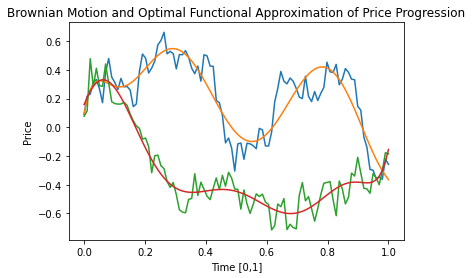

In [56]:
asset1=brownfit(100);
asset2=brownfit(100);
c=np.cov(asset1[1],asset2[1]);
mu=np.array([asset1[0],asset2[0]])
u=np.ones((2,), dtype=int)
cinv = np.linalg.inv(c)
w=np.matmul(u,cinv)/np.matmul(np.matmul(u,cinv),np.transpose(u))
muv=np.matmul(mu,np.transpose(w))
sigv=(np.matmul(np.matmul(w,c), np.transpose(w))) ** 0.5;

print('Minimum Variance Portfolio found via Function Approximation')
print('Weights of Asset 1 and Asset 2')
print(w)
print('expected return')
print(muv)
print('expected risk')
print(sigv)
